In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [9]:
import IPython.display

In [10]:
from qutip import *

In [11]:
#system Parameters
#-------------------------------------------
Nc = 4           #Number of Cavity states
Nm = 80          #Number of mechanical states
kappa = 0.3      #cavity damping rate
E = 0.1          #Driving Amplitude
g0 = 2.4*kappa   #Vaccum coupling strength
Qm = 1e4        #mech quality factor
gamma = 1/Qm     #Mech damping rate
n_th = 1         #mechanical bath temprature
delta = -0.43   #detuning

## Build Hamiltonian and Collapse operators

In [18]:
# Operators 
#-----------
a = tensor(destroy(Nc),qeye(Nm))
b = tensor(qeye(Nc),destroy(Nm))

In [46]:
num_b = b.dag()*b
num_a = a.dag()*a

In [47]:
num_a

Quantum object: dims = [[4, 80], [4, 80]], shape = (320, 320), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 3. 0. 0.]
 [0. 0. 0. ... 0. 3. 0.]
 [0. 0. 0. ... 0. 0. 3.]]

In [48]:
num_b

Quantum object: dims = [[4, 80], [4, 80]], shape = (320, 320), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 77.  0.  0.]
 [ 0.  0.  0. ...  0. 78.  0.]
 [ 0.  0.  0. ...  0.  0. 79.]]

In [49]:
#HAmiltonian 
#---------------------------

H = -delta*num_a + num_b +g0*(b.dag()+b)*num_a + E*(a.dag()+a)

In [50]:
H

Quantum object: dims = [[4, 80], [4, 80]], shape = (320, 320), type = oper, isherm = True
Qobj data =
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          2.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 78.29       19.07660347
   0.        ]
 [ 0.          0.          0.         ... 19.07660347 79.29
  19.19849994]
 [ 0.          0.          0.         ...  0.         19.19849994
  80.29      ]]

In [53]:
#collapse operators
#---------------------------
cc= np.sqrt(kappa)*a
cm = np.sqrt(gamma*(1+n_th))*b
cp = np.sqrt(gamma*n_th)*b.dag()
cops = [cc,cm,cp]

In [54]:
cops

[Quantum object: dims = [[4, 80], [4, 80]], shape = (320, 320), type = oper, isherm = False
 Qobj data =
 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]],
 Quantum object: dims = [[4, 80], [4, 80]], shape = (320, 320), type = oper, isherm = False
 Qobj data =
 [[0.         0.01414214 0.         ... 0.         0.         0.        ]
  [0.         0.         0.02       ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.12489996 0.        ]
  [0.         0.         0.         ... 0.         0.         0.12569805]
  [0.         0.         0.         ... 0.         0.         0.        ]],
 Quantum object: dims = [[4, 80], [4, 80]], shape = (320, 320), type = oper, isherm = False
 Qobj data =
 [[0.         0.         0.         ... 0.         0.         0.     

## Run steady state solvers

In [55]:
solvers = ['direct','eigen','power','iterative-gmres','iterative-bicgstab']

In [57]:
solvers

['direct', 'eigen', 'power', 'iterative-gmres', 'iterative-bicgstab']

In [58]:
mech_dm = []

In [62]:
for ss in solvers:
    if ss in ['iterative-gmres','iterative-bicgstab']:
        use_rcm = True
    else:
        use_rcm = False
    rho_ss, info = steadystate(H,cops,method=ss, use_precond = True, use_rcm=use_rcm,
                              tol = 1e-15, return_info=True)
    print(ss,'solution time =',info['solution_time'])
    rho_mech = ptrace(rho_ss,1)
    

direct solution time = 4.695765972137451
eigen solution time = 75.99998474121094
power solution time = 3.898486614227295
iterative-gmres solution time = 77.17584872245789
iterative-bicgstab solution time = 78.94274163246155


In [63]:
mech_dm = np.asarray(mech_dm)

In [64]:
mech_dm

array([], dtype=float64)

## Check consistency of solution

In [65]:
for kk in range(len(mech_dm)):
    print((mech_dm[kk]-mech_dm[0]).data.nnz)

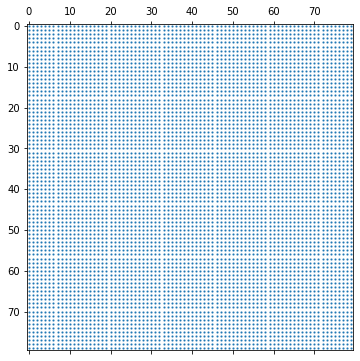

In [75]:
fig = plt.figure(figsize=(8,6))
plt.spy(rho_mech.data,ms=1)     #This visualizes the non-zero values of the array.

In [69]:
diag = rho_mech.diag()

In [70]:
diag

array([1.99618606e-03, 1.07919092e-02, 6.25237712e-02, 4.20804795e-02,
       1.53571734e-02, 7.89811181e-03, 6.19352135e-03, 6.19799761e-03,
       7.02503483e-03, 8.97124213e-03, 1.45467001e-02, 2.83288423e-02,
       5.22801361e-02, 7.71342129e-02, 8.44656994e-02, 6.98337981e-02,
       4.73634970e-02, 2.89359402e-02, 1.71459376e-02, 1.05781181e-02,
       7.35421811e-03, 5.97372731e-03, 5.44974219e-03, 5.25813129e-03,
       5.19809036e-03, 5.27478231e-03, 5.64292424e-03, 6.57779070e-03,
       8.42595985e-03, 1.15065640e-02, 1.59404249e-02, 2.14122441e-02,
       2.70003002e-02, 3.13293063e-02, 3.31373174e-02, 3.19281733e-02,
       2.81988058e-02, 2.30831271e-02, 1.77512888e-02, 1.30009899e-02,
       9.18590752e-03, 6.34711329e-03, 4.36854490e-03, 3.07646356e-03,
       2.28861987e-03, 1.83972685e-03, 1.59651784e-03, 1.46406433e-03,
       1.38384797e-03, 1.32665316e-03, 1.28428264e-03, 1.26235168e-03,
       1.27405696e-03, 1.33428212e-03, 1.45537762e-03, 1.64629728e-03,
      

In [72]:
rho_mech2 = qdiags(diag,0,dims=rho_mech.dims,shape=rho_mech.shape)

In [73]:
rho_mech2

Quantum object: dims = [[80], [80]], shape = (80, 80), type = oper, isherm = True
Qobj data =
[[1.99618606e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.07919092e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.25237712e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.94871196e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.37577639e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.92003247e-05]]

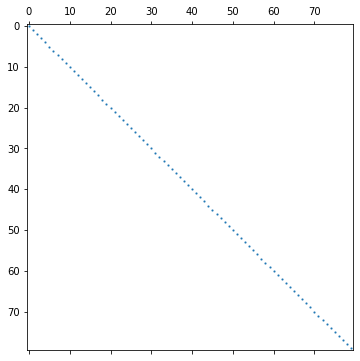

In [74]:
fig = plt.figure(figsize=(8,6))
plt.spy(rho_mech2.data, ms=1)

In [76]:
xvec = np.linspace(-20,20,256)
W = wigner(rho_mech2,xvec,xvec)
wmap = wigner_cmap(W, shift=-1e-5)

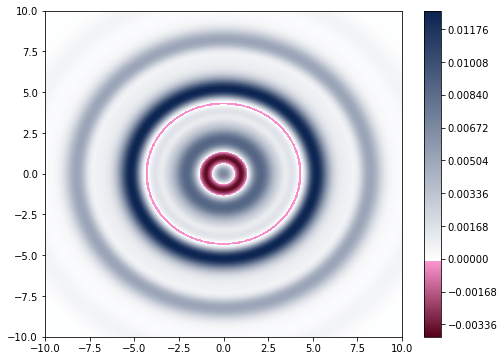

In [88]:
fig,ax = plt.subplots(figsize=(8,6))
c = ax.contourf(xvec,xvec,W,256,cmap=wmap)

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
plt.colorbar(c,ax=ax)